<a href="https://colab.research.google.com/github/cristobalperezp/Desafio-Itau/blob/main/Best_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"> Desafío Banco Itaú
<h2 align="center">  Cristóbal Pérez
<h3 align="center"> 
<h3 align="center"> 2022

---

# Lectura de Datos

In [ ]:
# instalación de librerías y paquetes
! pip3 install squarify
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# configuración de gráficos
sns.set(
    context = 'notebook',
    style='whitegrid',
    palette = sns.color_palette("vlag")
    )
cmap = sns.color_palette("vlag", as_cmap=True)

In [ ]:
# setear el path
path_base = '/content/drive/MyDrive/Desafío Itaú'

In [ ]:
# lectura de datos
path = path_base+'/Bases de Datos/data.csv'
df = pd.read_csv(path)

# División de la Data

In [ ]:
df.head()

,Unnamed: 0,id,periodo,edad,sexo_1,renta,Q_prods,TC_cupo,TC_saldo,CCTE_saldo,...,LCRED_saldo,ABONO_monto,ABONO_op,TRANS_op,TRANS_monto,TC_renta_cupo,TC_gasto,TC_ratio_cupo,LCRED_ratio_cupo,aumento
0,231349,1,202208,74,0,685.667045,9,1136.363636,1136.363636,11352.039773,...,0.000000,5249.069318,25.0,22.0,2238.636364,6.033870e-01,0.000000,0.000000,0.00000,0.0
1,231350,2,202208,68,1,0.000000,4,6818.181818,41.572727,10.169318,...,1136.363636,681.818182,1.0,0.0,0.000000,0.000000e+00,6776.609091,0.993903,0.00000,0.0
2,231351,3,202208,74,1,511.363636,2,1022.727273,0.000000,0.000000,...,0.000000,7947.058034,2.0,0.0,2110.862161,5.000000e-01,1022.727273,1.000000,0.00000,0.0
3,231352,4,202208,80,0,1704.545455,4,0.000000,0.000000,0.000000,...,4096.864773,3469.013636,17.0,4.0,738.636364,0.000000e+00,0.000000,0.000000,0.09869,0.0
4,231353,5,202208,77,1,0.001136,4,7954.545455,2716.700000,583.101136,...,1136.363636,2772.020455,10.0,1.0,1135.607955,1.428571e-07,5237.845455,0.658472,0.00000,0.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'periodo', 'edad', 'sexo_1', 'renta', 'Q_prods',
       'TC_cupo', 'TC_saldo', 'CCTE_saldo', 'LCRED_cupo', 'LCRED_saldo',
       'ABONO_monto', 'ABONO_op', 'TRANS_op', 'TRANS_monto', 'TC_renta_cupo',
       'TC_gasto', 'TC_ratio_cupo', 'LCRED_ratio_cupo', 'aumento'],
      dtype='object')

In [ ]:
X_test = df.copy()
mask = X_test['periodo'] == 202208

X_test = df[mask]

In [ ]:
y_test = X_test['aumento']
X_test = X_test.drop(columns=['aumento','id','periodo','Unnamed: 0'])

In [ ]:
X = df.copy()
mask = X['periodo'] != 202208
X = X[mask]

X_train= X.drop(columns=['aumento','id','periodo','Unnamed: 0'])
y_train = X['aumento']

## Split y Escalar Data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
#X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, test_size=0.2, random_state=12345,shuffle=True, stratify=y_train)

In [ ]:
import sklearn
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [ ]:
X_resampled.shape

(35606, 17)

In [ ]:
y_resampled.value_counts()

0.0    17803
1.0    17803
Name: aumento, dtype: int64

# Best Model

In [ ]:
{'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 1000}

{'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 1000}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    random_state = 12345,
    max_depth = 5,
    min_samples_split = 4,
    n_estimators = 1000
)
model.fit(X_resampled, y_resampled)

RandomForestClassifier(max_depth=5, min_samples_split=4, n_estimators=1000,
                       random_state=12345)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.99      0.53      0.70    227587
         1.0       0.03      0.79      0.05      3808

    accuracy                           0.54    231395
   macro avg       0.51      0.66      0.37    231395
weighted avg       0.98      0.54      0.68    231395



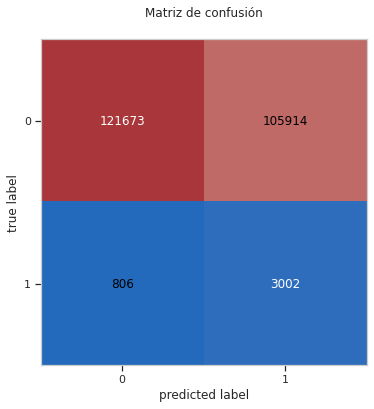

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,model.predict(X_test)), figsize=(6,6),cmap = cmap)
plt.title('Matriz de confusión')
plt.show()

In [ ]:
X.columns

Index(['Unnamed: 0', 'id', 'periodo', 'edad', 'sexo_1', 'renta', 'Q_prods',
       'TC_cupo', 'TC_saldo', 'CCTE_saldo', 'LCRED_cupo', 'LCRED_saldo',
       'ABONO_monto', 'ABONO_op', 'TRANS_op', 'TRANS_monto', 'TC_renta_cupo',
       'TC_gasto', 'TC_ratio_cupo', 'LCRED_ratio_cupo', 'aumento'],
      dtype='object')

In [ ]:
X_t_copy = pd.DataFrame(
    X_test, columns=['edad', 'sexo_1', 'renta', 'Q_prods',
       'TC_cupo', 'TC_saldo', 'CCTE_saldo', 'LCRED_cupo', 'LCRED_saldo',
       'ABONO_monto', 'ABONO_op', 'TRANS_op', 'TRANS_monto', 'TC_renta_cupo',
       'TC_gasto', 'TC_ratio_cupo', 'LCRED_ratio_cupo']
)
X_t_copy

,edad,sexo_1,renta,Q_prods,TC_cupo,TC_saldo,CCTE_saldo,LCRED_cupo,LCRED_saldo,ABONO_monto,ABONO_op,TRANS_op,TRANS_monto,TC_renta_cupo,TC_gasto,TC_ratio_cupo,LCRED_ratio_cupo
0,2.712645,-1.188339,-0.003484,3.273485,-0.759892,-0.070702,0.618805,-0.844586,-0.762166,-0.083465,0.624689,0.787747,0.017375,-0.009342,-0.846072,-0.005151,-0.473845
1,2.194680,0.841511,-0.004056,-0.819502,0.058540,-0.421772,-0.268666,-0.462209,-0.337767,-0.233273,-0.351966,-0.324068,-0.272696,-0.009360,0.288166,-0.003399,-0.473845
2,2.712645,0.841511,-0.003630,-2.456697,-0.776260,-0.435103,-0.269462,-0.844586,-0.762166,0.005030,-0.311272,-0.324068,0.000818,-0.009345,-0.674893,-0.003389,-0.473845
3,3.230610,-1.188339,-0.002635,-0.819502,-0.923578,-0.435103,-0.269462,0.684922,0.767894,-0.141852,0.299137,-0.121920,-0.176987,-0.009360,-0.846072,-0.005151,-0.177500
4,2.971627,0.841511,-0.004056,-0.819502,0.222227,0.436071,-0.223836,-0.462209,-0.337767,-0.164713,0.014280,-0.273531,-0.125550,-0.009360,0.030615,-0.003990,-0.473845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231390,0.640785,0.841511,-0.000711,-0.819502,-0.596205,-0.364117,0.397532,-0.462209,-0.337767,0.008431,-0.270578,-0.273531,-0.236825,-0.009307,-0.502725,-0.003560,-0.473845
231391,0.122821,0.841511,0.002763,-0.819502,1.122502,0.981830,5.363599,1.067299,1.359828,-0.017812,-0.351966,0.029692,1.223892,-0.009343,0.791853,-0.003937,-0.473845
231392,0.468131,0.841511,-0.000375,-0.000905,-0.432519,-0.435144,-0.269462,-0.462209,-0.760717,-0.254636,-0.270578,-0.273531,-0.269245,-0.009321,-0.275453,-0.003389,2.518709
231393,-0.481472,0.841511,0.008159,-0.000905,-0.105146,-0.492740,-0.042653,0.302545,0.511030,-0.255636,-0.392660,-0.222994,-0.270046,-0.009282,0.135008,-0.003333,-0.473845


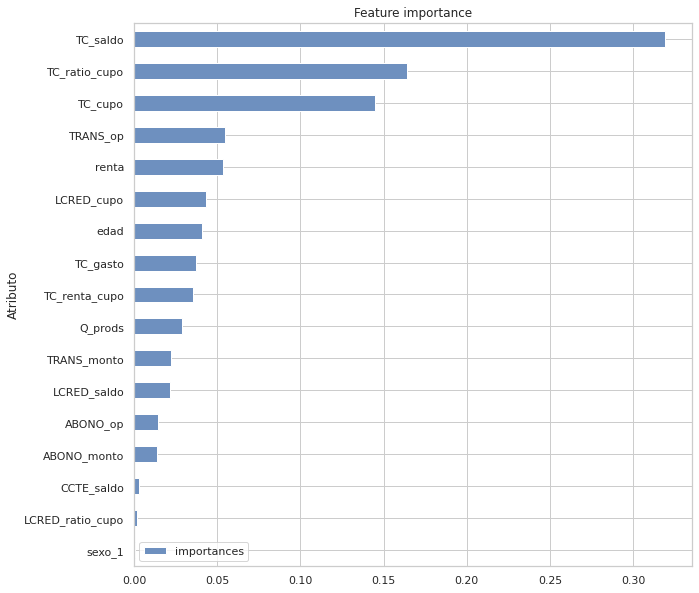

In [ ]:
# entrenamiento y obtención de feature importance para variables no normalizadas
bestfeatures = set()

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
imps = pd.DataFrame.from_dict({"importances": importances})
imps.index = list(X_t_copy)
imps.sort_values(by="importances").plot.barh(figsize=(10, 10))
bestfeatures |= set(imps.sort_values(by="importances").iloc[-10:].index) # add best features
plt.title("Feature importance");
plt.ylabel("Atributo");

In [ ]:
import shap

In [ ]:
# Fits the explainer
explainer = shap.Explainer(model.predict, X_t_copy)
# Calculates the SHAP values - It takes some time
X_t_sub = X_t_copy.sample(5000)
shap_values = explainer(X_t_sub)

Permutation explainer:  49%|████▉     | 2473/5000 [2:29:59<2:32:26,  3.62s/it]

In [ ]:
# Evaluate SHAP values
#shap_values = explainer.shap_values(X)

In [ ]:
#shap.summary_plot(shap_values)
# or 
shap.plots.beeswarm(shap_values)
plt.title("SHAP values atributos más relevantes")
plt.ylabel("Atributos")
plt.show()

# Predicción

In [ ]:
path = path_base+'/Bases de Datos/envio.csv'
envio = pd.read_csv(path)

In [ ]:
path = path_base+'/Bases de Datos/predicciones_202209.csv'
predicciones = pd.read_csv(path)

In [ ]:
envio

,Unnamed: 0,id,periodo,edad,sexo_1,renta,Q_prods,TC_cupo,TC_saldo,CCTE_saldo,...,LCRED_saldo,ABONO_monto,ABONO_op,TRANS_op,TRANS_monto,TC_renta_cupo,TC_gasto,TC_ratio_cupo,LCRED_ratio_cupo,aumento
0,0,1,202209,74,0,685.667045,9,1136.363636,609.786364,10586.322727,...,0.000000,3794.363636,16.0,31.0,2017.272727,6.033870e-01,526.577273,0.463388,0.000000,NaN
1,1,2,202209,68,1,0.000000,4,6818.181818,44.465909,316.987500,...,1136.363636,306.818182,1.0,0.0,0.000000,0.000000e+00,6773.715909,0.993478,0.000000,NaN
3,3,4,202209,80,0,1704.545455,4,0.000000,0.000000,0.000000,...,4351.481818,4328.512500,18.0,1.0,170.454545,0.000000e+00,0.000000,0.000000,0.042674,NaN
4,4,5,202209,77,1,0.001136,4,7954.545455,4355.707955,0.000000,...,635.146591,3067.114773,5.0,4.0,1480.392045,1.428571e-07,3598.837500,0.452425,0.441071,NaN
5,5,6,202209,78,1,5089.192045,4,12215.909091,427.164773,1402.802273,...,7500.000000,6811.831818,9.0,7.0,5365.601136,4.166036e-01,11788.744318,0.965032,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231342,231342,231113,202209,31,1,2395.595455,5,2272.727273,2216.586318,4679.627273,...,2272.727273,4719.388636,14.0,8.0,3039.753409,1.054062e+00,56.140955,0.024702,0.000000,NaN
231343,231343,231114,202209,46,1,6986.818182,4,17045.454545,2298.713636,114474.163636,...,1306.818182,94595.200000,5.0,5.0,570.743182,4.098933e-01,14746.740909,0.865142,0.000000,NaN
231344,231344,231115,202209,50,1,4013.506818,4,2272.727273,186.548864,5489.072727,...,1136.363636,5088.039773,1.0,0.0,0.000000,1.765943e+00,2086.178409,0.917918,0.000000,NaN
231345,231345,231116,202209,44,1,8181.818182,4,14204.545455,3113.057955,74037.314773,...,5681.818182,7558.481818,3.0,1.0,189.204545,5.760000e-01,11091.487500,0.780841,0.000000,NaN


In [ ]:
predicciones

,id,target
0,1,NaN
1,2,NaN
2,4,NaN
3,5,NaN
4,6,NaN
...,...,...
187305,231113,NaN
187306,231114,NaN
187307,231115,NaN
187308,231116,NaN


In [ ]:
base = pd.merge(envio,predicciones,how='left',on='id')

In [ ]:
base

,Unnamed: 0,id,periodo,edad,sexo_1,renta,Q_prods,TC_cupo,TC_saldo,CCTE_saldo,...,ABONO_monto,ABONO_op,TRANS_op,TRANS_monto,TC_renta_cupo,TC_gasto,TC_ratio_cupo,LCRED_ratio_cupo,aumento,target
0,0,1,202209,74,0,685.667045,9,1136.363636,609.786364,10586.322727,...,3794.363636,16.0,31.0,2017.272727,6.033870e-01,526.577273,0.463388,0.000000,NaN,NaN
1,1,2,202209,68,1,0.000000,4,6818.181818,44.465909,316.987500,...,306.818182,1.0,0.0,0.000000,0.000000e+00,6773.715909,0.993478,0.000000,NaN,NaN
2,3,4,202209,80,0,1704.545455,4,0.000000,0.000000,0.000000,...,4328.512500,18.0,1.0,170.454545,0.000000e+00,0.000000,0.000000,0.042674,NaN,NaN
3,4,5,202209,77,1,0.001136,4,7954.545455,4355.707955,0.000000,...,3067.114773,5.0,4.0,1480.392045,1.428571e-07,3598.837500,0.452425,0.441071,NaN,NaN
4,5,6,202209,78,1,5089.192045,4,12215.909091,427.164773,1402.802273,...,6811.831818,9.0,7.0,5365.601136,4.166036e-01,11788.744318,0.965032,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187305,231342,231113,202209,31,1,2395.595455,5,2272.727273,2216.586318,4679.627273,...,4719.388636,14.0,8.0,3039.753409,1.054062e+00,56.140955,0.024702,0.000000,NaN,NaN
187306,231343,231114,202209,46,1,6986.818182,4,17045.454545,2298.713636,114474.163636,...,94595.200000,5.0,5.0,570.743182,4.098933e-01,14746.740909,0.865142,0.000000,NaN,NaN
187307,231344,231115,202209,50,1,4013.506818,4,2272.727273,186.548864,5489.072727,...,5088.039773,1.0,0.0,0.000000,1.765943e+00,2086.178409,0.917918,0.000000,NaN,NaN
187308,231345,231116,202209,44,1,8181.818182,4,14204.545455,3113.057955,74037.314773,...,7558.481818,3.0,1.0,189.204545,5.760000e-01,11091.487500,0.780841,0.000000,NaN,NaN


In [ ]:
mask = envio['id'].isin( predicciones['id'])
envio = envio[mask]

In [ ]:
envio.columns

Index(['Unnamed: 0', 'id', 'periodo', 'edad', 'sexo_1', 'renta', 'Q_prods',
       'TC_cupo', 'TC_saldo', 'CCTE_saldo', 'LCRED_cupo', 'LCRED_saldo',
       'ABONO_monto', 'ABONO_op', 'TRANS_op', 'TRANS_monto', 'TC_renta_cupo',
       'TC_gasto', 'TC_ratio_cupo', 'LCRED_ratio_cupo', 'aumento'],
      dtype='object')

In [ ]:
envio  = envio[[ 'edad', 'sexo_1', 'renta', 'Q_prods',
       'TC_cupo', 'TC_saldo', 'CCTE_saldo', 'LCRED_cupo', 'LCRED_saldo',
       'ABONO_monto', 'ABONO_op', 'TRANS_op', 'TRANS_monto', 'TC_renta_cupo',
       'TC_gasto', 'TC_ratio_cupo', 'LCRED_ratio_cupo']]

In [ ]:
envio = sc.transform(envio)

In [ ]:
pred = model.predict(envio)
pred

array([1., 0., 0., ..., 1., 1., 0.])

In [ ]:
predicciones['target'] = pred

In [ ]:
predicciones.to_csv('cristobal_perez_20221129_V1.csv',index=False)